In [1]:
%pylab inline
import ThonkTools as TT
from uncertainties import unumpy as unp
from uncertainties import ufloat
from scipy import interpolate
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
def csvReader(x):
    """
        csvReader takes a csv file and creats a list with lists of the colloms.
        It also turns strings into numbers if possible.
    """
    import csv
    with open(x, 'r') as csvFile:
        reader = csv.reader(csvFile)
        l = None
        for row in reader:
            if l == None:
                l = [[] for i in range(len(row))]
                for i in range(len(l)):
                    try:
                        try:
                            l[i].append(float(row[i]))
                        except:
                            l[i].append(row[i])
                    except:
                        None
            else:
                for i in range(len(l)):
                    try:
                        try:
                            l[i].append(float(row[i]))
                        except:
                            l[i].append(row[i])
                    except:
                        None
    return l    
    csvFile.close()

In [3]:
def Gaußfit_pm(x, y, p0=None):
    return TT.fit_pm(x, y, func=lambda x, A, s, c, d: A * (1 / (2 * pi * s**2)) * e**(-1/2 * ((x - c)/(s))**2) + d, p0=p0)

def Gaußfit(x, y, p0=None, r=None, d=None):
    return TT.fit(x, y, func=lambda x, A, s, c, d: A * (1 / (2 * pi * s**2)) * e**(-1/2 * ((x - c)/(s))**2) + d, r=r, d=d, p0=p0)

In [4]:
def fit(x, y, func=lambda x: x, p0=None, r=None, d=None, sigma=None):
    """
        fit takes data points, calculates the curve fit, and gives back
        the values with which the curve can be plotted
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: the function type the curve_fit will be applied to.
        r: determines the size of steps in which the x-achse intervall is split.
        d: tuple which determines the start and end point of the x-achse intervall on which the
            will be drawn. If not given the curve will be drawn between the largest and the smalest
            given x-value.
        Returns:
        -----------
        xnew: x-value with which the fitted curve can be plotted.
        ynew: y-value with which the fitted curve can be plotted.
    """
    import numpy as np
    from scipy.optimize import curve_fit
    popt, pvoc = curve_fit(func, x, y, p0=p0, sigma=sigma)
    params = popt.copy()
    if d == None:
        if r == None:
            xnew = np.arange(min(x), max(x), np.abs((max(x) - min(x)) / 100))
        else:
            xnew = np.arange(min(x), max(x), r)
    else:
        if r == None:
            xnew = np.arange(min(d), max(d), np.abs((max(x) - min(x)) / 100))
        else:
            xnew = np.arange(min(d), max(d), r)
    ynew = func(xnew, *params)
    return xnew, ynew

def linfit(x, y, p0=None, r=None, d=None, sigma=None):
    return fit(x, y, func=lambda x, a, b,: a * x + b, r=r, d=d, p0=p0, sigma=sigma)

def exfit(x, y, p0=None, r=None, d=None, sigma=None):
    return fit(x, y, func=lambda x, a, b, c: a * e**(-x / b) + c, r=r, d=d, p0=p0, sigma=sigma)

def sqfit(x, y, p0=None, r=None, d=None, sigma=None):
    return fit(x, y, func=lambda x, D, c: np.sqrt(2*D*x) + c, r=r, d=d, p0=p0, sigma=sigma)

In [5]:
def fit_pm(x, y, func=lambda x: x, p0=None, sigma=None):
    """
        fit_pm takes data points and makes an exponential curve fit. It returns
        the parameters with errors and the coefficient of determination
        Parameters:
        -----------
        x: x-value of the data points.
        y: y-value of the data points.
        func: Function to be fitted to.
        Returns:
        -----------
        list: Gives back a list with the parameters of an expotential function the
              corresponding errors and the coefficient of determination.
    """
    from scipy.optimize import curve_fit
    import numpy as np
    popt, pcov = curve_fit(func, x, y, p0=p0, sigma=sigma)
    params = popt.copy()
    errors = np.sqrt(np.diag(pcov))
    r = np.array(y) - func(np.array(x), *params)
    rss = np.sum(r ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    R_2 = 1 - (rss / tss)
    try:
        from uncertainties import unumpy as unp
        return unp.uarray(params, errors), R_2
    except:
        return np.array(params), np.array(errors), R_2
    
def linfit_pm(x, y, p0=None, sigma=None):
    return fit_pm(x, y, func=lambda x, a, b,: a * x + b, p0=p0, sigma=sigma)

def exfit_pm(x, y, p0=None, sigma=None):
    return fit_pm(x, y, func=lambda x, a, b, c: a * e**(-x / b) + c, p0=p0, sigma=sigma)

def sqfit_pm(x, y, p0=None, sigma=None):
    return fit_pm(x, y, func=lambda x, D, c: np.sqrt(D*x) + c, p0=p0, sigma=sigma)

In [6]:
d1 = csvReader('Am_Si .csv')
d2 = csvReader('CobaltSilicon.csv')
d3 = csvReader('Am_Catmium.csv')
d4 = csvReader('CobaltCatmium.csv')

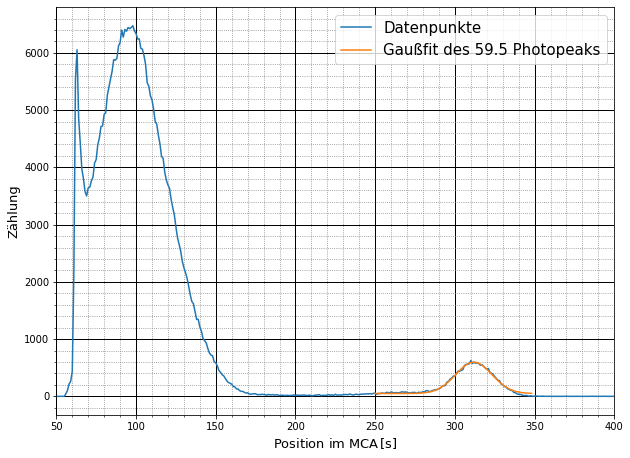

In [7]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

x = arange(50,800,1)
plt.plot(x, d1[0][50:800],label='Datenpunkte')

p1=[200000, 10, 310, 0]
x_fit1 = arange(250,350,1)
xnew1 ,ynew1 = Gaußfit(x_fit1, d1[0][250:350],p1)
A_S_1 = Gaußfit_pm(x_fit1, d1[0][250:350],p1)
plt.plot(xnew1 ,ynew1,label='Gaußfit des 59.5 Photopeaks')

#https://www.nucleonica.com/Application/ReducedDecaySchemes/Am241_TXT.htm
#p2=[2000000, 10, 100, 0]
#x_fit2 = arange(70,150,1)
#xnew2 ,ynew2 = Gaußfit(x_fit2, d1[0][70:150],p2)
#A_S_2 = Gaußfit_pm(x_fit2, d1[0][70:150],p2)
#plt.plot(xnew2 ,ynew2)

###   Label / Title

plt.ylabel(r'Zählung', fontsize=13)
plt.xlabel(r'Position im MCA$\,[\mathrm{s}]$', fontsize=13)
#plt.title('Am_Si', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([50,(400)])
#axes.set_ylim([-300,370])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('ASg.png')
plt.show()

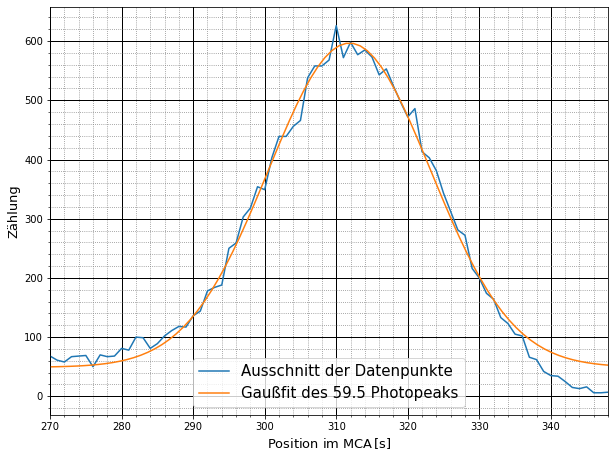

In [8]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

x = arange(260,360,1)
plt.plot(x, d1[0][260:360],label='Ausschnitt der Datenpunkte')

p1=[200000, 10, 310, 0]
x_fit1 = arange(250,350,1)
xnew1 ,ynew1 = Gaußfit(x_fit1, d1[0][250:350],p1)
A_S_1 = Gaußfit_pm(x_fit1, d1[0][250:350],p1)
plt.plot(xnew1 ,ynew1,label='Gaußfit des 59.5 Photopeaks')

#https://www.nucleonica.com/Application/ReducedDecaySchemes/Am241_TXT.htm
#p2=[2000000, 10, 100, 0]
#x_fit2 = arange(70,150,1)
#xnew2 ,ynew2 = Gaußfit(x_fit2, d1[0][70:150],p2)
#A_S_2 = Gaußfit_pm(x_fit2, d1[0][70:150],p2)
#plt.plot(xnew2 ,ynew2)

###   Label / Title

plt.ylabel(r'Zählung', fontsize=13)
plt.xlabel(r'Position im MCA$\,[\mathrm{s}]$', fontsize=13)
#plt.title('Am_Si', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([270,348])
#axes.set_ylim([-300,370])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('AS.png')
plt.show()

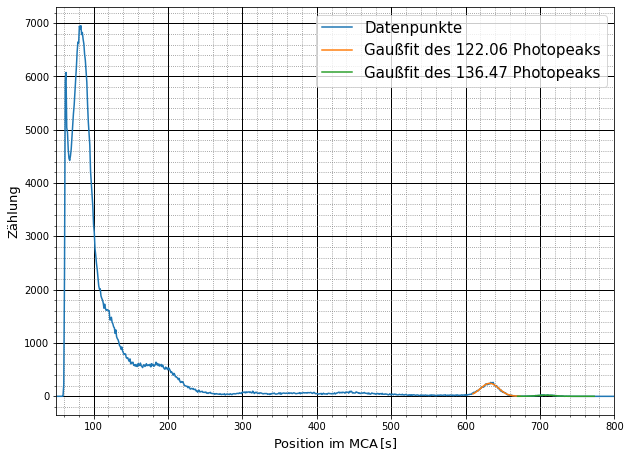

In [9]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

x = arange(50,800,1)
plt.plot(x, d2[0][50:800],label='Datenpunkte')


p1=[50000, 20, 625, 0]
x_fit2 = arange(610,675,1)
xnew2 ,ynew2 = Gaußfit(x_fit2, d2[0][610:675],p1)
C_S_1 = Gaußfit_pm(x_fit2, d2[0][610:675],p1)
plt.plot(xnew2 ,ynew2,label='Gaußfit des 122.06 Photopeaks')


p2=[50000, 20, 708, 0]
x_fit2 = arange(670,775,1)
xnew2 ,ynew2 = Gaußfit(x_fit2, d2[0][670:775],p2)
C_S_2 = Gaußfit_pm(x_fit2, d2[0][670:775],p2)
plt.plot(xnew2 ,ynew2,label='Gaußfit des 136.47 Photopeaks')


#plt.plot(x_fit2, p2[0] * (1 / (2 * pi * p2[1]**2)) * e**(-1/2 * ((x_fit2 - p2[2])/(p2[1]))**2) + p2[3])

###   Label / Title

plt.ylabel(r'Zählung', fontsize=13)
plt.xlabel(r'Position im MCA$\,[\mathrm{s}]$', fontsize=13)
#plt.title('CobaltSilicon', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([50,800])
#axes.set_ylim([-300,370])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('CSg.png')
plt.show()

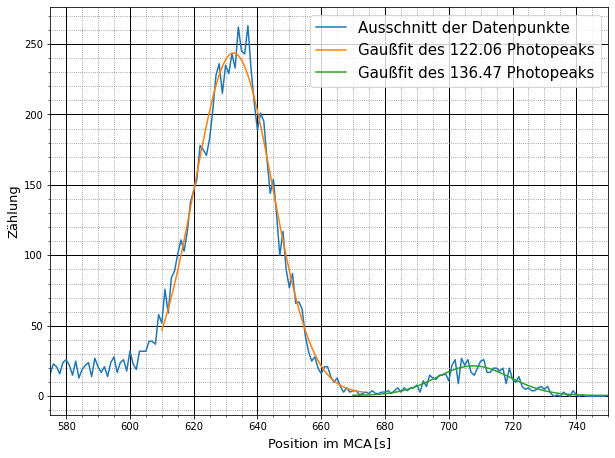

In [10]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

x = arange(550,750,1)
plt.plot(x, d2[0][550:750],label='Ausschnitt der Datenpunkte')


p1=[50000, 20, 625, 0]
x_fit2 = arange(610,675,1)
xnew2 ,ynew2 = Gaußfit(x_fit2, d2[0][610:675],p1)
C_S_1 = Gaußfit_pm(x_fit2, d2[0][610:675],p2)
plt.plot(xnew2 ,ynew2,label='Gaußfit des 122.06 Photopeaks')


p2=[50000, 20, 708, 0]
x_fit2 = arange(670,775,1)
xnew2 ,ynew2 = Gaußfit(x_fit2, d2[0][670:775],p2)
C_S_2 = Gaußfit_pm(x_fit2, d2[0][670:775],p2)
plt.plot(xnew2 ,ynew2,label='Gaußfit des 136.47 Photopeaks')


#plt.plot(x_fit2, p2[0] * (1 / (2 * pi * p2[1]**2)) * e**(-1/2 * ((x_fit2 - p2[2])/(p2[1]))**2) + p2[3])

###   Label / Title

plt.ylabel(r'Zählung', fontsize=13)
plt.xlabel(r'Position im MCA$\,[\mathrm{s}]$', fontsize=13)
#plt.title('CobaltSilicon', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([575,750])
#axes.set_ylim([-300,370])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('CS.png')
plt.show()

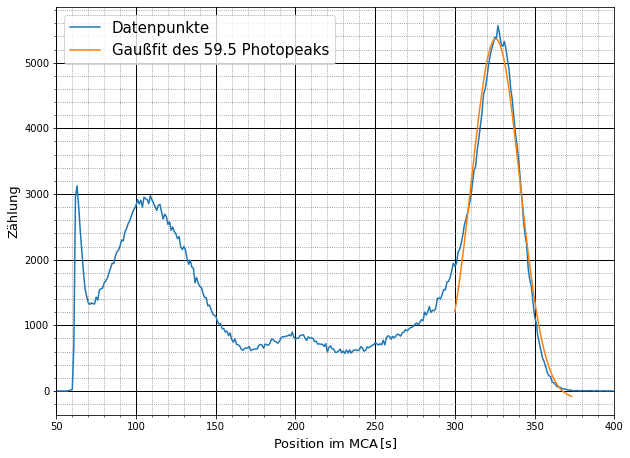

In [11]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

x = arange(50,400,1)
plt.plot(x, d3[0][50:400],label='Datenpunkte')

p1=[200000, 10, 325, 0]
x_fit1 = arange(300,375,1)
xnew1 ,ynew1 = Gaußfit(x_fit1, d3[0][300:375],p1)
A_C_1 = Gaußfit_pm(x_fit1, d3[0][300:375],p1)
plt.plot(xnew1 ,ynew1,label='Gaußfit des 59.5 Photopeaks')

###   Label / Title

plt.ylabel(r'Zählung', fontsize=13)
plt.xlabel(r'Position im MCA$\,[\mathrm{s}]$', fontsize=13)
#plt.title('Am_Catmium.', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([50,400])
#axes.set_ylim([-300,370])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('ACg.png')
plt.show()

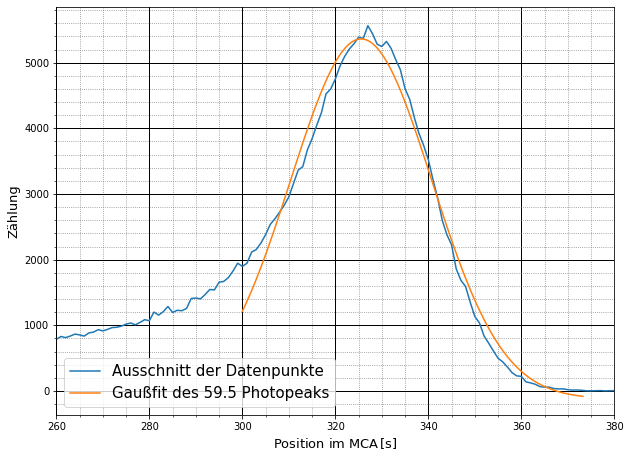

In [12]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

x = arange(250,400,1)
plt.plot(x, d3[0][250:400],label='Ausschnitt der Datenpunkte')

p1=[200000, 10, 325, 0]
x_fit1 = arange(300,375,1)
xnew1 ,ynew1 = Gaußfit(x_fit1, d3[0][300:375],p1)
A_C_1 = Gaußfit_pm(x_fit1, d3[0][300:375],p1)
plt.plot(xnew1 ,ynew1,label='Gaußfit des 59.5 Photopeaks')

###   Label / Title

plt.ylabel(r'Zählung', fontsize=13)
plt.xlabel(r'Position im MCA$\,[\mathrm{s}]$', fontsize=13)
#plt.title('Am_Catmium.', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([260,380])
#axes.set_ylim([-300,370])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('AC.png')
plt.show()

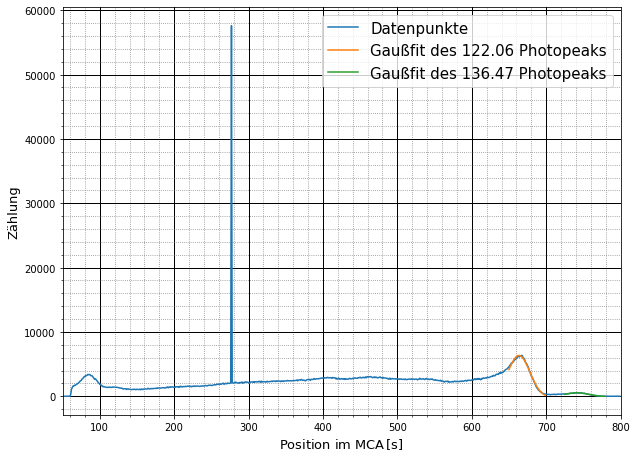

In [13]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

x = arange(50,800,1)
plt.plot(x, d4[0][50:800],label='Datenpunkte')

p1=[7500000, 13, 665, 0]
x_fit1 = arange(650,700,1)
xnew1 ,ynew1 = Gaußfit(x_fit1, d4[0][650:700],p1)
C_C_1 = Gaußfit_pm(x_fit1, d4[0][650:700],p1)
plt.plot(xnew1 ,ynew1,label='Gaußfit des 122.06 Photopeaks')


p2=[90000, 10, 740, 0]
x_fit2 = arange(725,780,1)
xnew2 ,ynew2 = Gaußfit(x_fit2, d4[0][725:780],p2)
C_C_2 = Gaußfit_pm(x_fit2, d4[0][725:780],p2)
plt.plot(xnew2 ,ynew2,label='Gaußfit des 136.47 Photopeaks')
#plt.plot(x_fit1, p1[0] * (1 / (2 * pi * p1[1]**2)) * e**(-1/2 * ((x_fit1 - p1[2])/(p1[1]))**2) + p1[3])

###   Label / Title

plt.ylabel(r'Zählung', fontsize=13)
plt.xlabel(r'Position im MCA$\,[\mathrm{s}]$', fontsize=13)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([50,800])
#axes.set_ylim([-300,370])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('CCg.png')
plt.show()

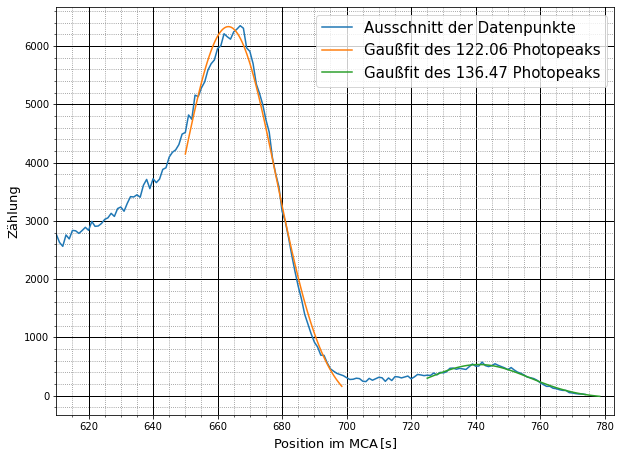

In [14]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

x = arange(610,775,1)
plt.plot(x, d4[0][610:775],label='Ausschnitt der Datenpunkte')

p1=[7500000, 13, 665, 0]
x_fit1 = arange(650,700,1)
xnew1 ,ynew1 = Gaußfit(x_fit1, d4[0][650:700],p1)
C_C_1 = Gaußfit_pm(x_fit1, d4[0][650:700],p1)
plt.plot(xnew1 ,ynew1,label='Gaußfit des 122.06 Photopeaks')


p2=[90000, 10, 740, 0]
x_fit2 = arange(725,780,1)
xnew2 ,ynew2 = Gaußfit(x_fit2, d4[0][725:780],p2)
C_C_2 = Gaußfit_pm(x_fit2, d4[0][725:780],p2)
plt.plot(xnew2 ,ynew2,label='Gaußfit des 136.47 Photopeaks')
#plt.plot(x_fit1, p1[0] * (1 / (2 * pi * p1[1]**2)) * e**(-1/2 * ((x_fit1 - p1[2])/(p1[1]))**2) + p1[3])

###   Label / Title

plt.ylabel(r'Zählung', fontsize=13)
plt.xlabel(r'Position im MCA$\,[\mathrm{s}]$', fontsize=13)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([610,783])
#axes.set_ylim([-300,370])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('CC.png')
plt.show()

In [15]:
x_S_v = [A_S_1[0][2].nominal_value,C_S_1[0][2].nominal_value,C_S_2[0][2].nominal_value]
x_C_v = [A_C_1[0][2].nominal_value,C_C_1[0][2].nominal_value,C_C_2[0][2].nominal_value]
x_S_e = [A_S_1[0][2].std_dev,C_S_1[0][2].std_dev,C_S_2[0][2].std_dev]
x_C_e = [A_C_1[0][2].std_dev,C_C_1[0][2].std_dev,C_C_2[0][2].std_dev]
energy = np.array([59.5,122.06,136.47])
print('{:L}'.format(A_S_1[0][2]),'\n','{:L}'.format(A_C_1[0][2]))
print('{:L}'.format(C_S_1[0][2]),'\n','{:L}'.format(C_C_1[0][2]))
print('{:L}'.format(C_S_2[0][2]),'\n','{:L}'.format(C_C_2[0][2]))

311.86 \pm 0.14 
 325.55 \pm 0.18
632.49 \pm 0.17 
 663.34 \pm 0.16
707.7 \pm 0.5 
 741.05 \pm 0.25


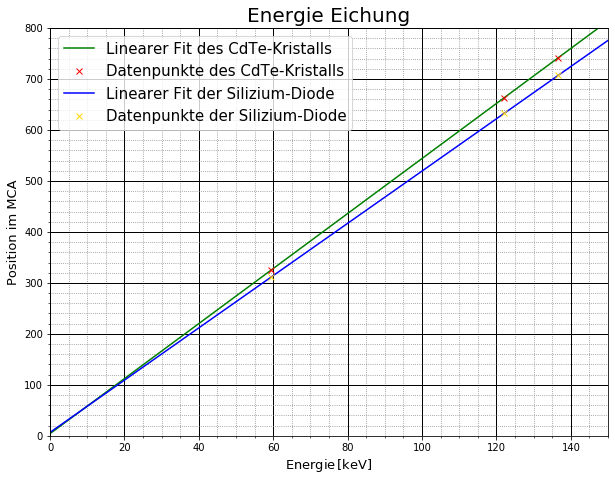

In [16]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

xnew ,ynew = linfit(energy, x_C_v, sigma=x_C_e, d=(-1,151))
Cali1 = linfit_pm(energy, x_C_v, sigma=x_C_e)

plt.plot(xnew,ynew,label='Linearer Fit des CdTe-Kristalls',color='green')
plt.plot(energy,x_C_v,'x',color='red', label='Datenpunkte des CdTe-Kristalls')
#plt.errorbar(energy,x_C_v,x_C_e,fmt='x',color='red',label='errir')

xnew ,ynew = linfit(energy, x_S_v, sigma=x_S_e, d=(-1,151))
Cali2 = linfit_pm(energy, x_S_v, sigma=x_S_e)

plt.plot(xnew,ynew,label='Linearer Fit der Silizium-Diode',color='blue')
plt.plot(energy,x_S_v,'x',color='gold', label='Datenpunkte der Silizium-Diode')
#plt.errorbar(energy,x_C_v,x_C_e,fmt='x',color='red',label='errir')


###   Label / Title

plt.ylabel(r'Position im MCA', fontsize=13)
plt.xlabel(r'Energie$\,[\mathrm{keV}]$', fontsize=13)
plt.title('Energie Eichung', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

axes.set_xlim([0,150])
axes.set_ylim([0,800])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend(fontsize=15)
plt.savefig('Eichung.png')
plt.show()

In [26]:
#Abostbtionstuff
A_S = [A_S_1[0][0],C_S_1[0][0],C_S_2[0][0]]
A_C = [A_C_1[0][0],C_C_1[0][0],C_C_2[0][0]]
a_C = 23
a_S = 100
Abs_A_1 = (A_S[0]/(a_S*2*pi*A_S_1[0][1]))/(A_C[0]/(a_C*2*pi*A_C_1[0][1]))
Abs_C_1 = (A_S[1]/(a_S*2*pi*C_S_1[0][1]))/(A_C[0]/(a_C*2*pi*A_C_1[0][1]))
Abs_C_2 = (A_S[2]/(a_S*2*pi*A_S_1[0][1]))/(A_C[0]/(a_C*2*pi*A_C_1[0][1]))
print(A_C,'HHHHHH',A_S)

[7955835.587065446+/-376522.3550487597, 9071160.138482912+/-550932.0748522334, 907928.7962820794+/-83858.77245956982] HHHHHH [443937.7960168613+/-13332.953317343343, 228406.20022453557+/-11257.828131243135, 17800.38476677698+/-1691.9932526520001]


In [27]:
ab =[Abs_A_1*100,Abs_C_1*100,Abs_C_2*100]
for i in range(3):
    print('{:L}'.format(ab[i]))

1.72 \pm 0.11
-0.80 \pm 0.06
0.070 \pm 0.009


In [19]:
#FWHM
A_S_F = 2.35*np.array([A_S_1[0][1],C_S_1[0][1],C_S_2[0][1]])/energy
A_C_F = 2.35*np.array([A_C_1[0][1],C_C_1[0][1],C_C_2[0][1]])/energy


In [20]:
for i in range(3):
    print('{:L}'.format(A_S_F[i]))

0.449 \pm 0.007
-0.236 \pm 0.005
0.200 \pm 0.010


In [21]:
for i in range(3):
    print('{:L}'.format(A_C_F[i]))

0.600 \pm 0.012
0.285 \pm 0.007
0.272 \pm 0.010


In [22]:
print(Cali1)

(array([5.398823112469095+/-0.00098495048614719,
       4.330574913597256+/-0.10594872990127356], dtype=object), 0.999999958239388)


In [23]:
print(Cali2)

(array([5.1284833279926305+/-0.008689078578609325,
       6.68735729709056+/-0.814308407608499], dtype=object), 0.9999853411230517)
